# Warehouse Search 1

### Generate environment

- Regular wharehouse (no paths blocked)
    - Number of obsctacles is static
- Random wharehouse (paths can be blocked)
    - Number of obstacles can be changed 
- Dimensions can be changed
- Only one robot is working
- Only one package is retrieved

In [1]:
from src.environment import Environment, WarehouseTypeEnum
from src.algorithms import Search, AlgorithmTypeEnum, HeuristicEnum
from src.utils import visualize_warehouse, visualize_working_path
from src.robot_handler import MultiRobotHandler

env = Environment(
    WarehouseTypeEnum.Regular,
    rows = 200,
    cols = 200,
    n_packages=1,
    n_robots=1
)# env = Environment(WarehouseTypeEnum.Random,rows = 1000, cols = 1000, obstacle_count=2000)

## Uninformed search

### Breadth First search (BFS) algorithm

Cost to Package:  302.0  units of time
Solution found with cost of:  606.0  units of time
Search Time:  0.43222689628601074 seconds
Total Time:  606.432226896286 seconds (assuming unit of time is second)  with  Breadth First Search (BFS)


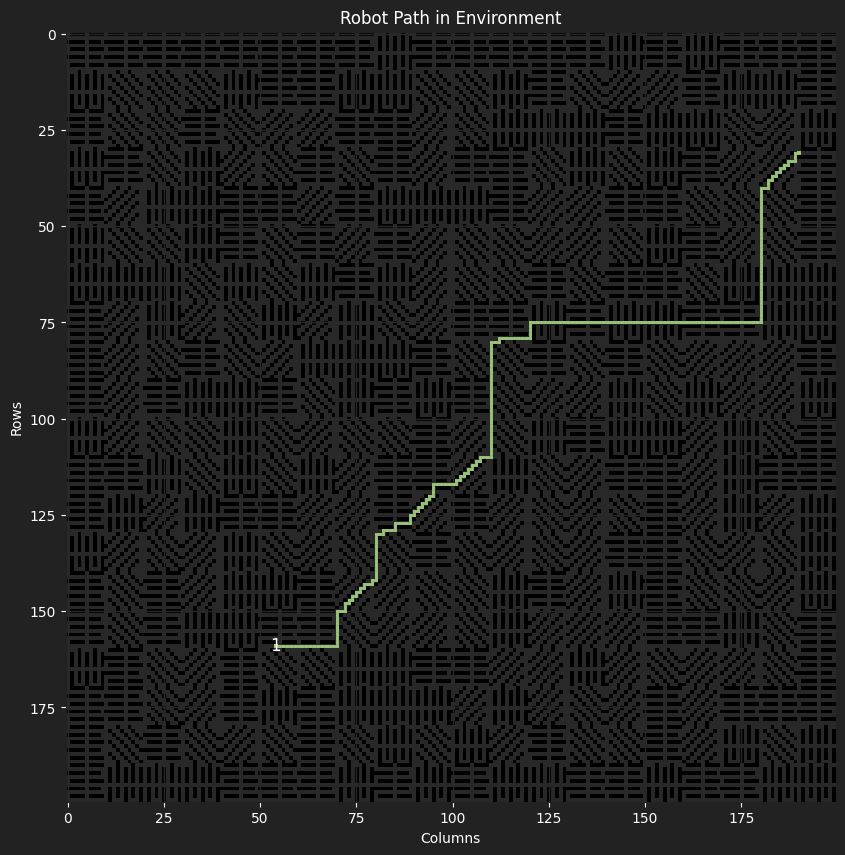

In [2]:
search_bfs = Search(AlgorithmTypeEnum.BFS, env)
search_bfs.print_cost()

visualize_warehouse(env, search_bfs)

### Dijkstra's search algorithm

Cost to Package:  284.0  units of time
Solution found with cost of:  570.0  units of time
Search Time:  0.730332612991333 seconds
Total Time:  570.7303326129913 seconds (assuming unit of time is second)  with  Dijkstra's Search


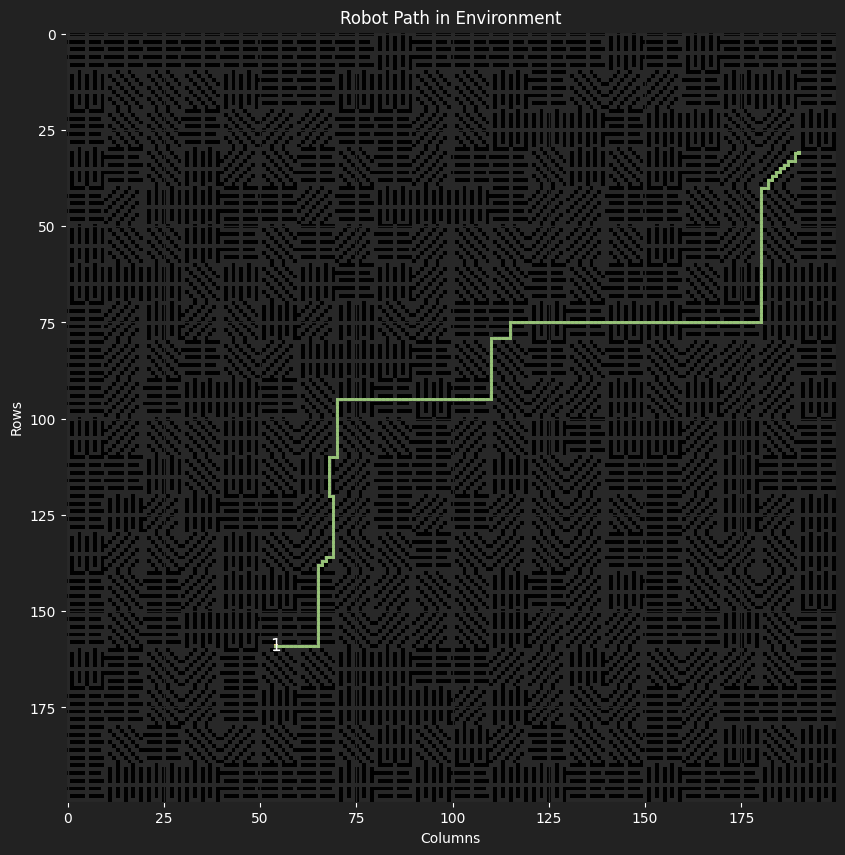

In [3]:
search_dijkstra = Search(AlgorithmTypeEnum.DIJKSTRA, env)
search_dijkstra.print_cost()

visualize_warehouse(env, search_dijkstra)

## Informed search
### A * search algorithm

Cost to Package:  284.0  units of time
Solution found with cost of:  570.0  units of time
Search Time:  0.2483828067779541 seconds
Total Time:  570.248382806778 seconds (assuming unit of time is second)  with  A* Search


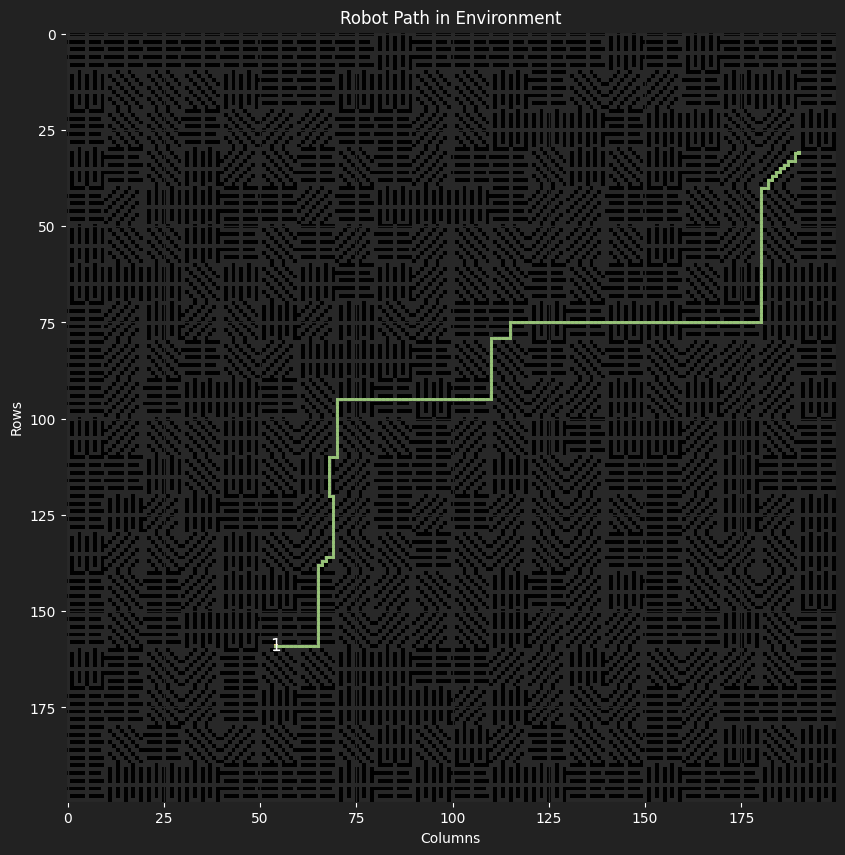

In [4]:
search_a = Search(AlgorithmTypeEnum.A_STAR, env, HeuristicEnum.MANHATTAN)

search_a.print_cost()

visualize_warehouse(env, search_a)

### Iterative Deepening A * (IDA) search algorithm

Cost to Package:  284.0  units of time
Solution found with cost of:  570.0  units of time
Search Time:  0.24474477767944336 seconds
Total Time:  570.2447447776794 seconds (assuming unit of time is second)  with  Iterative Deepening A* (IDA) Search


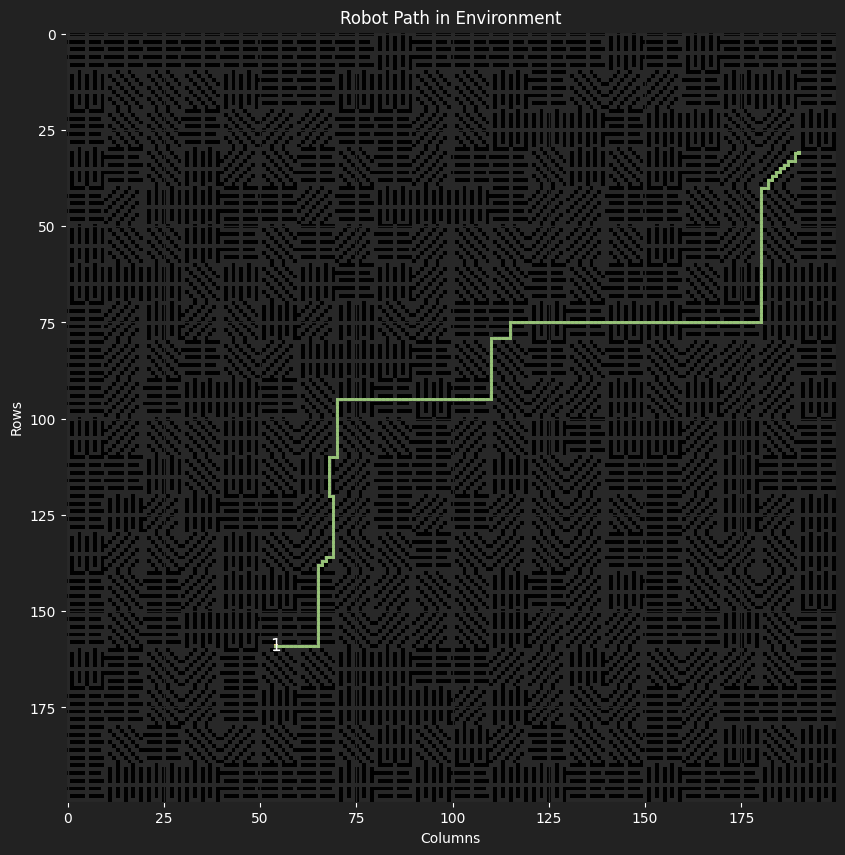

In [5]:
search_ida = Search(AlgorithmTypeEnum.IDA_STAR, env, HeuristicEnum.MANHATTAN)

search_ida.print_cost()

visualize_warehouse(env, search_ida)

# Warehouse Search 2

### Generate environment

- Regular wharehouse (no paths blocked)
    - Number of obsctacles is static
- Random wharehouse (paths can be blocked)
    - Number of obstacles can be changed 
- Dimensions can be changed
- Only one robot is working
- Multiple Packages Available

In [6]:
env = Environment(
    WarehouseTypeEnum.Regular,
    rows = 200,
    cols = 200,
    n_packages=40,
    n_robots=4
) # we define 4 robots, but using Search class only the first is working

## Uninformed search

### Breadth First search (BFS) algorithm

Solution found with:  2576.0  cost
Search Time:  15.9703848361969
Total Time:  2591.970384836197  with  Breadth First Search (BFS)


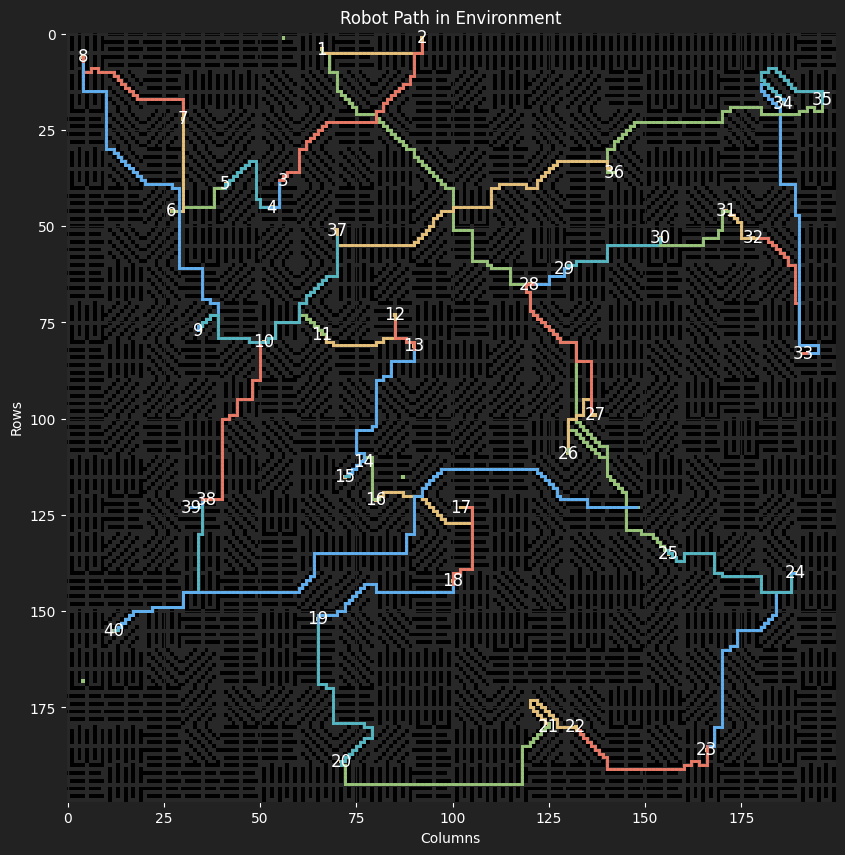

In [7]:
search_bfs = Search(AlgorithmTypeEnum.BFS, env)
search_bfs.print_cost()

visualize_warehouse(env, search_bfs)

### Dijkstra's search algorithm

Solution found with:  2442.0  cost
Search Time:  3.5806050300598145
Total Time:  2445.58060503006  with  Dijkstra's Search


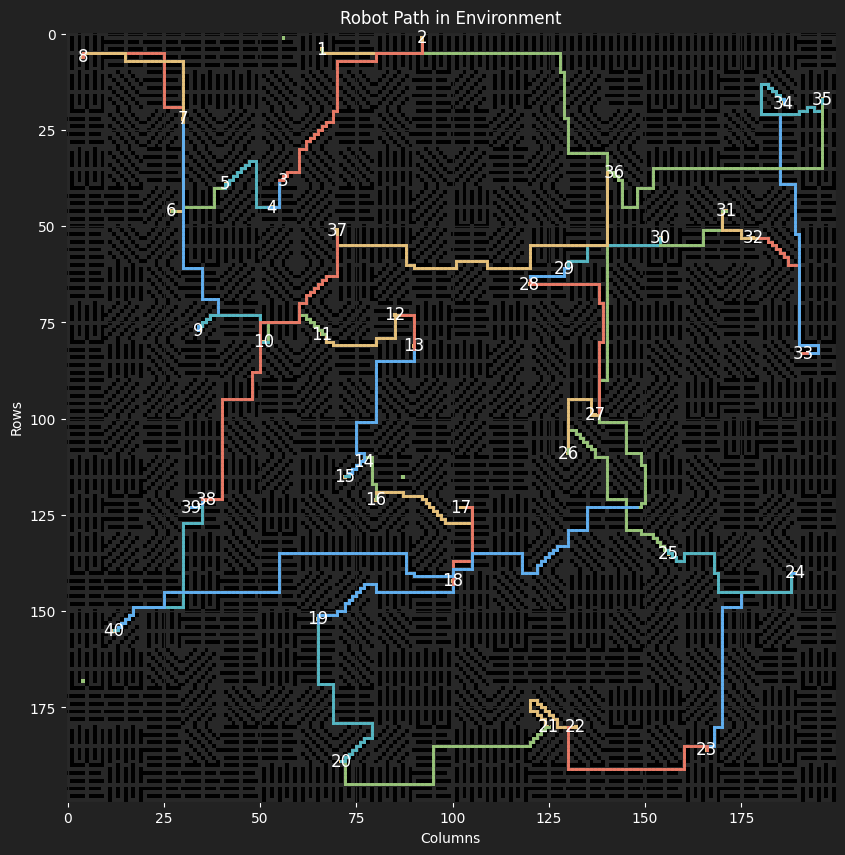

In [8]:
search_dijkstra = Search(AlgorithmTypeEnum.DIJKSTRA, env)
search_dijkstra.print_cost()

visualize_warehouse(env, search_dijkstra)

## Informed search

### A * search algorithm

Solution found with:  2442.0  cost
Search Time:  0.712688684463501
Total Time:  2442.7126886844635  with  A* Search


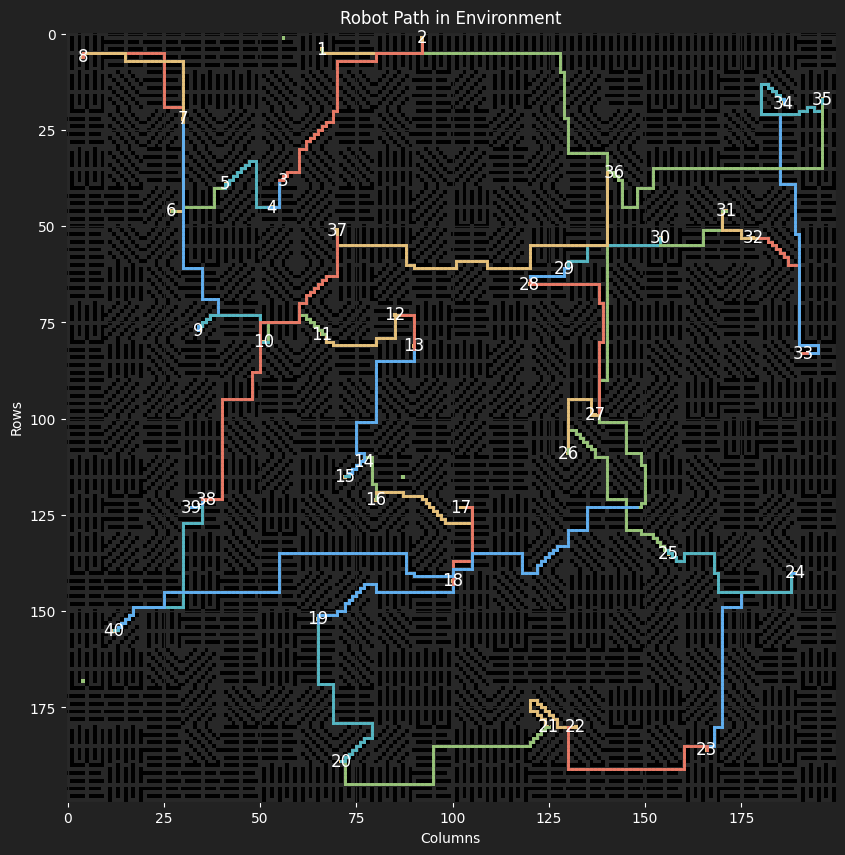

In [9]:
search_a = Search(AlgorithmTypeEnum.A_STAR, env, HeuristicEnum.MANHATTAN)

search_a.print_cost()

visualize_warehouse(env, search_a)

### Iterative Deepening A * (IDA) search algorithm

Solution found with:  2442.0  cost
Search Time:  0.7167632579803467
Total Time:  2442.7167632579803  with  Iterative Deepening A* (IDA) Search


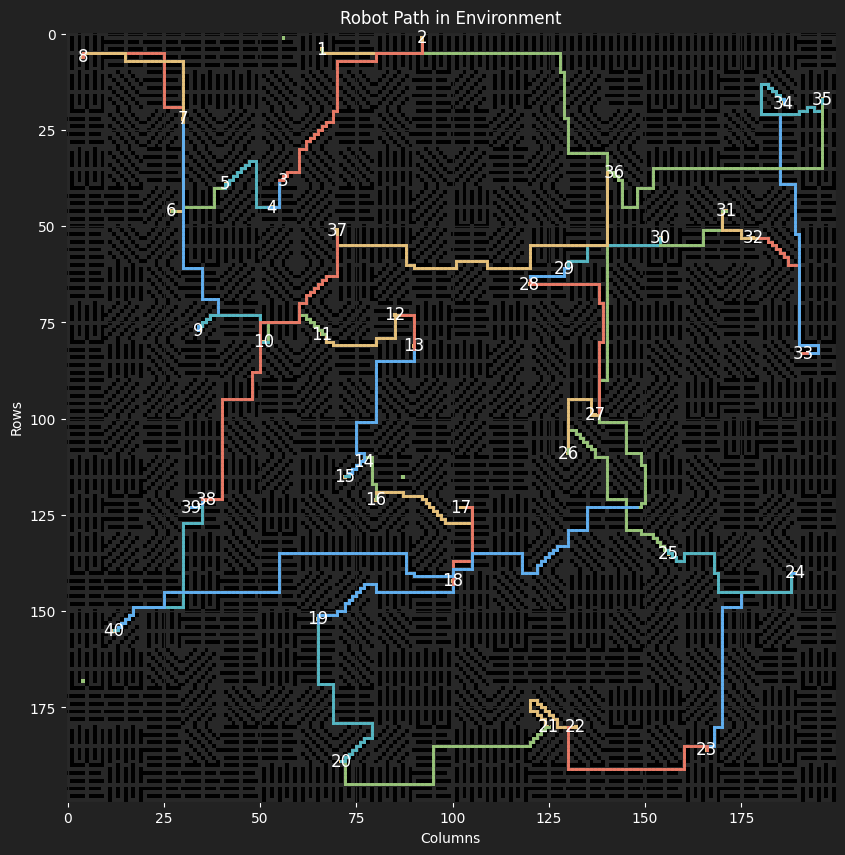

In [10]:
search_ida = Search(AlgorithmTypeEnum.IDA_STAR, env, HeuristicEnum.MANHATTAN)

search_ida.print_cost()

visualize_warehouse(env, search_ida)

### Warehouse Search 3

#### Generate environment

- Regular wharehouse (no paths blocked)
    - Number of obsctacles is static
- Random wharehouse (paths can be blocked)
    - Number of obstacles can be changed 
- Dimensions can be changed
- Multiple robots working
- Multiple Packages Available

Robot 0 Working Time: 733.5 units
Robot 1 Working Time: 594.0 units
Robot 2 Working Time: 640.5 units
Robot 3 Working Time: 242.5 units
Total cost (maximum working time + computational time): 736.9171991348267 units


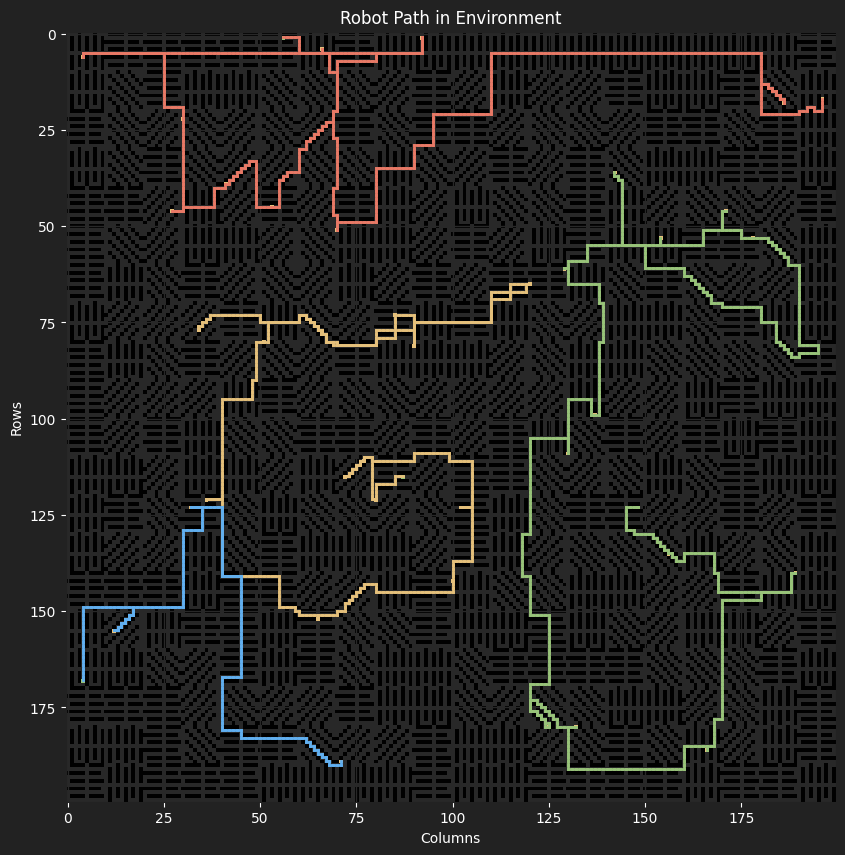

In [11]:
multi_robot_handler = MultiRobotHandler(env, AlgorithmTypeEnum.A_STAR, HeuristicEnum.MANHATTAN)
paths, individual_times, total_cost = multi_robot_handler.plan_paths()

for i, (path, time) in enumerate(zip(paths, individual_times)):
    print(f"Robot {i} Working Time: {time} units")

print(f"Total cost (maximum working time + computational time): {total_cost} units")

visualize_working_path(env, paths)

For comparison Wharehouse search 2 is the same environment but has only one robot working

## Benchmarks

In [12]:
from src.utils import visualize_data
from src.eval import test_algorithms, test_algorithms_computation, test_heuristic

### Total time comparison

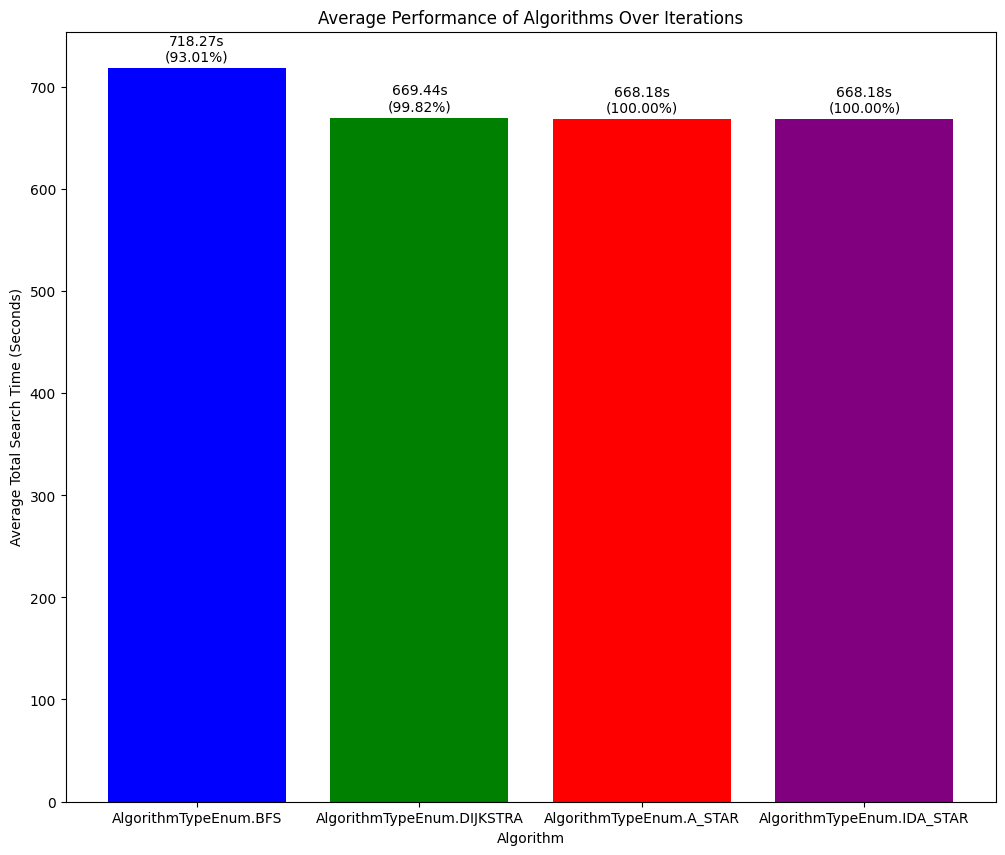

In [13]:
algorithms = [
    AlgorithmTypeEnum.BFS,
    AlgorithmTypeEnum.DIJKSTRA,
    AlgorithmTypeEnum.A_STAR,
    AlgorithmTypeEnum.IDA_STAR,
]

absolute_data, relative_data = test_algorithms(algorithms, HeuristicEnum.MANHATTAN, 20, 400, 400)
visualize_data(absolute_data, relative_data)

### Search Time

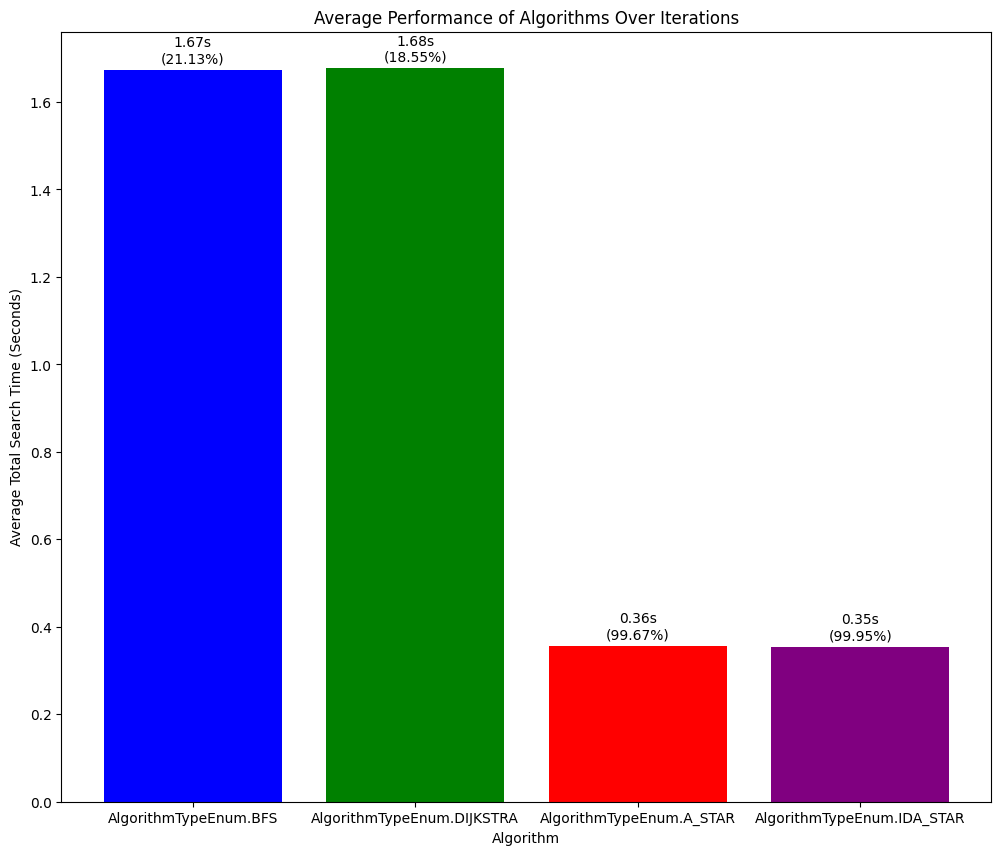

In [14]:
algorithms = [
    AlgorithmTypeEnum.BFS,
    AlgorithmTypeEnum.DIJKSTRA,
    AlgorithmTypeEnum.A_STAR,
    AlgorithmTypeEnum.IDA_STAR,
]

absolute_data, relative_data = test_algorithms_computation(algorithms, HeuristicEnum.MANHATTAN, 20, 400, 400)
visualize_data(absolute_data, relative_data)

### Heuristic Comparison

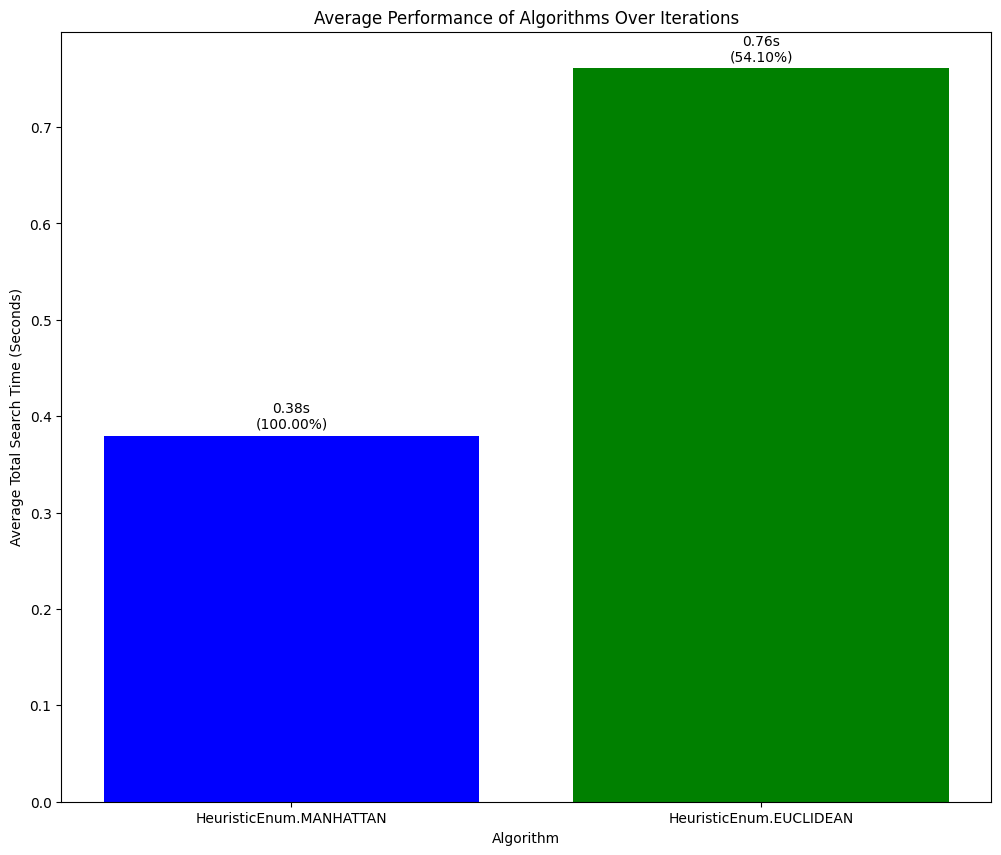

In [15]:
heuristics = [
    HeuristicEnum.MANHATTAN,
    HeuristicEnum.EUCLIDEAN,
]

absolute_data, relative_data = test_heuristic(heuristics, 20, 400, 400)
visualize_data(absolute_data, relative_data)